In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path('/content/drive/MyDrive/KN_Solvro/zad1')

In [ ]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipython-input-395903151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipython-input-395903151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [ ]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked', 'Title'], drop_first=True)


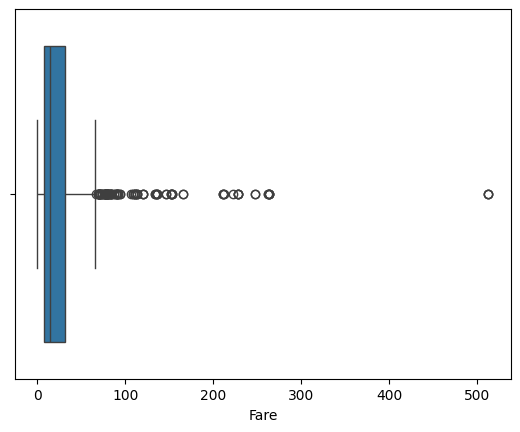

In [ ]:
sns.boxplot(x=titanic_df['Fare'])
plt.show()


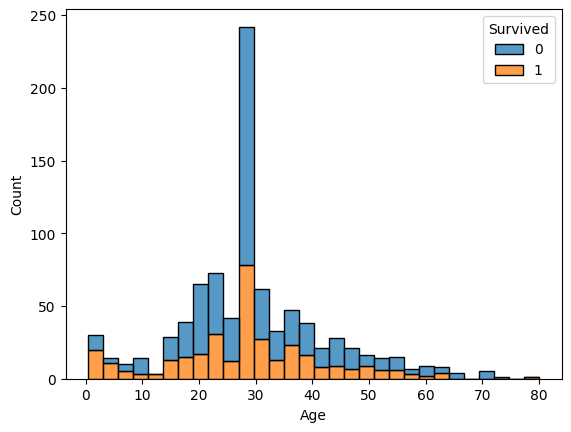

In [ ]:
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack')
plt.show()


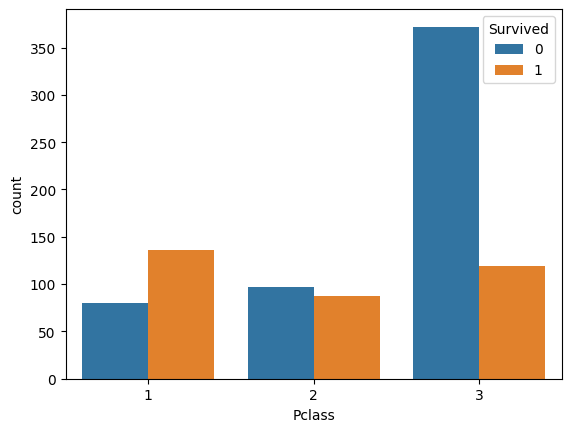

In [ ]:
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.show()


In [ ]:
print(titanic_df.isnull().sum())


Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare              98
Cabin              0
FamilySize         0
Embarked_Q         0
Embarked_S         0
Title_Col          0
Title_Countess     0
Title_Don          0
Title_Dr           0
Title_Jonkheer     0
Title_Lady         0
Title_Major        0
Title_Master       0
Title_Miss         0
Title_Mlle         0
Title_Mme          0
Title_Mr           0
Title_Mrs          0
Title_Ms           0
Title_Rev          0
Title_Sir          0
dtype: int64
